In [1]:
!pip install pycaret

  Obtaining dependency information for pycaret from https://files.pythonhosted.org/packages/3e/6f/b3d59fac3869a7685e68aecdd35c336800bce8c8d3b45687bb82cf9a2848/pycaret-3.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for scikit-learn>1.4.0 from https://files.pythonhosted.org/packages/1e/7d/1a2ea8eb5b4df373c30c7418cf26305a4a05e2a0e56c80a8043b791595f3/scikit_learn-1.5.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.0/165.0 kB 8.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for imbalanced-learn>=0.12.0 from https://files.pythonhosted.org/packages/5a/fa/267de06c95210580f4b82b45cec1ce1e9ce1f21a01a684367db89e7da70d/imbalanced_learn-0.12.3-py3-none-any.whl.metadata
  Obtaining dependency information for kaleido>=0.2.1 from https://files.pythonhosted.org/packages/ae/b3/a0f0f4faac229b0011d8c4a7ee6da7c2dca0b6fd08039c95920846f23ca4/kaleido-0.2.1-py2.py3-none-man

In [2]:
!pip install --upgrade pycaret tqdm

  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/18/eb/fdb7eb9e48b7b02554e1664afd3bd3f117f6b6d6c5881438a0b055554f9b/tqdm-4.66.4-py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.3/78.3 kB 61.9 kB/s eta 0:00:00ta 0:00:01
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.1
    Uninstalling tqdm-4.66.1:
      Successfully uninstalled tqdm-4.66.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 2023.814.150030 requires jupyter-server~=1.16, but you have jupyter-server 2.12.1 which is incompatible.
beatrix-jupyterlab 2023.814.150030 requires jupyterlab~=3.4, but you have jupyterlab 4.0.5 which is incompatible.
conda 23.11.0 requires packaging>=23.0, but you have packaging 21.3 which is 

In [3]:
# load libraries
import pandas as pd
from pycaret.regression import *
from pycaret.regression import RegressionExperiment

In [5]:
data = pd.read_csv('/kaggle/input/movie-of-2021/Movie_of_2k21 (1).csv')

In [6]:
data = data.drop(columns= 'Unnamed: 0', axis =1)

In [7]:
regressor = RegressionExperiment()

In [8]:
regressor.setup(data, target= 'revenue', session_id = 123)

,Description,Value
0,Session id,123
1,Target,revenue
2,Target type,Regression
3,Original data shape,"(2800, 22)"
4,Transformed data shape,"(2800, 176)"
5,Transformed train set shape,"(1959, 176)"
6,Transformed test set shape,"(841, 176)"
7,Numeric features,5
8,Categorical features,16
9,Rows with missing values,7.1%


In [9]:
# models comparision
best = regressor.compare_models(exclude=['lar'] )

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.7330
dt,Decision Tree Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.2000
catboost,CatBoost Regressor,5.3249,239.6144,15.3306,1.0000,0.0000,0.0000,2.7970
rf,Random Forest Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.4810
omp,Orthogonal Matching Pursuit,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.1980
knn,K Neighbors Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.2070
ridge,Ridge Regression,107016.1395,16938462129.0782,129926.1404,1.0000,3.0309,0.0332,0.2210
gbr,Gradient Boosting Regressor,62269.1880,5240155857.7418,71266.9003,1.0000,3.0328,0.0109,0.3890
et,Extra Trees Regressor,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.4760
lasso,Lasso Regression,11.7463,152.4587,12.3423,1.0000,0.7126,0.0000,0.2090


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

In [10]:
# get best model
print(best)

LinearRegression(n_jobs=-1)


# Analyze Model

In [11]:
regressor.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

Generate plots individual


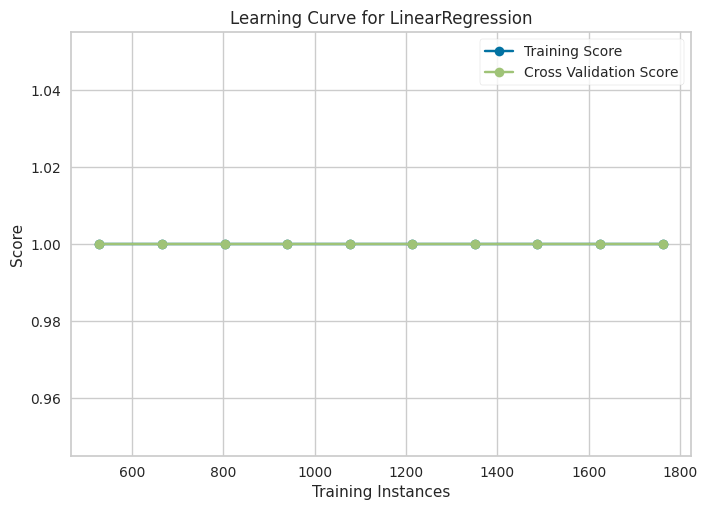

In [12]:
regressor.plot_model(best, plot= 'learning')

In [16]:
predictions = regressor.predict_model(best, data= data)
predictions.head()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000


,id,imdb_id,title,original_language,original_title,origin_country,production_companies,production_countries,runtime_in_mins,spoken_languages,...,popularity,release_date,overview,vote_count,vote_average,keywords,cast,crew,revenue,prediction_label
0,438631,tt1160419,Dune,en,Dune,US,Legendary Pictures,United States of America,155,"普通话, English",...,474.852997,2021-09-15,"Paul Atreides, a brilliant and gifted young ma...",11845,7.783,"empire, future, epic, army, based on novel or ...","Timothée Chalamet, Rebecca Ferguson, Oscar Isa...","Denis Villeneuve, Frank Herbert, Thomas Tull, ...",407573628,4.075736e+08
1,615457,tt7888964,Nobody,en,Nobody,US,"87North Productions, Odenkirk Provissiero Ente...",United States of America,92,"English, Pусский, Español",...,248.602997,2021-03-18,"Hutch Mansell, a suburban dad, overlooked husb...",6782,7.968,"assassin, double life, midlife crisis, bratva ...","Bob Odenkirk, Aleksey Serebryakov, Connie Niel...","Ilya Naishuller, Bob Odenkirk, Braden Aftergoo...",61779301,6.177930e+07
2,497698,tt3480822,Black Widow,en,Black Widow,US,Marvel Studios,United States of America,134,"English, Pусский",...,229.975006,2021-07-07,"Natasha Romanoff, also known as Black Widow, c...",9849,7.255,"assassin, hero, spy, kgb, based on comic, fema...","Scarlett Johansson, Florence Pugh, Rachel Weis...","Kevin Feige, Victoria Alonso, Louis D'Esposito...",379751131,3.797511e+08
3,634649,tt10872600,Spider-Man: No Way Home,en,Spider-Man: No Way Home,US,"Marvel Studios, Pascal Pictures, Columbia Pict...",United States of America,148,"English,",...,235.964005,2021-12-15,Peter Parker is unmasked and no longer able to...,19466,7.966,"new york city, hero, showdown, magic, loss of ...","Tom Holland, Zendaya, Benedict Cumberbatch, Ja...","Kevin Feige, Amy Pascal, Jon Watts, Stan Lee, ...",1921847111,1.921847e+09
4,580489,tt7097896,Venom: Let There Be Carnage,en,Venom: Let There Be Carnage,US,"Columbia Pictures, Pascal Pictures, Matt Tolma...",United States of America,97,"English, Español",...,236.354996,2021-09-30,After finding a host body in investigative rep...,9704,6.799,"hero, psychopath, superhero, anti hero, villai...","Tom Hardy, Woody Harrelson, Michelle Williams,...","Amy Pascal, Matt Tolmach, Avi Arad, Oliver Sch...",506900000,5.069000e+08


# save the model

In [17]:
regressor.save_model(best, 'my_best_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['id', 'runtime_in_mins',
                                              'popularity', 'vote_count',
                                              'vote_average'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['imdb_id', 'title',
                                              'original_language',
                                              'original_title', 'origin_country',
                                              'production_companies',
                                              'production_cou...
                                              'keywords', 'cast', 'crew'],
                                     transformer=OneHotEncoder(cols=['imdb_id',
                                                                     'title',
                     